## GMM

* Find the parameters of GMM associated with the customer-dataset, using the EM method. Vary the number of components, and observe the results. Implement GMM in a class which has the routines to fit data (e.g. gmm.fit(data, number of clusters)), a routine to obtain the parameters, a routine to calculate the likelihoods for a given set of samples and a routine to obtain the membership values of data samples.

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,Index,Gender,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0,67,2,124670,1,2
1,1,1,1,22,1,150773,1,2
2,2,0,0,49,1,89210,0,0
3,3,0,0,45,1,171565,1,1
4,4,0,0,53,1,149031,1,1


In [4]:
data.describe()

,Index,Gender,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,999.500000,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,577.494589,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,499.750000,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,999.500000,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1499.250000,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1999.000000,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
data.nunique()

Index              2000
Gender                2
Marital status        2
Age                  58
Education             4
Income             1982
Occupation            3
Settlement size       3
dtype: int64

In [6]:
data =pd.get_dummies(data,drop_first=True,columns=['Gender','Marital status','Education','Occupation','Settlement size'])

In [7]:
data.drop(['Index'],axis=1,inplace=True)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data,columns = data.columns)

In [10]:
scaled_data

,Age,Income,Gender_1,Marital status_1,Education_1,Education_2,Education_3,Occupation_1,Occupation_2,Settlement size_1,Settlement size_2
0,0.844828,0.324781,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.068966,0.420210,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.534483,0.195144,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.465517,0.496223,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.603448,0.413842,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0.500000,0.320595,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.155172,0.299460,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1997,0.224138,0.184871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.103448,0.227162,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
scaled_data = scaled_data.reindex()

In [12]:
scaled_data = np.array(scaled_data)

## GMM

In [13]:
from scipy.stats import multivariate_normal
class GMM:
    def __init__(self,no_of_clusters,threshold=1e-6,max_iterations =1000):
        self.no_of_clusters = no_of_clusters
        self.nrows = None
        self.ncols = None
        self.phi = None
        self.mean = None
        self.cov = None
        self.weights = None
        self.prev_likelihood = -np.inf
        self.threshold = threshold
        self.max_iterations = max_iterations
        self.threshold = threshold
    def fit(self,x):
        self.nrows = x.shape[0]
        self.ncols = x.shape[1]
        self.initialize(x)
        iteration =1
        while(iteration<self.max_iterations):
            self.likelihood = self.cal_likelihood(x)
            self.E_step(x)
            self.M_step(x)
            iteration+=1

    def cal_likelihood(self,x):
        likelihood = []
        for i in range(self.no_of_clusters):
            dist = multivariate_normal(self.mean[i],self.cov[i])
            likelihood.append(dist.pdf(x))
        likelihood = np.array(likelihood).T
        return likelihood
    
    def E_step(self,x):
        weights = []
        for i in range(self.nrows):
            weight = []
            for j in range(self.no_of_clusters):
                weight.append((self.phi[j]*self.likelihood[i][j])/np.dot(self.phi,self.likelihood[i]))
            weights.append(weight)
        self.weights = np.array(weights)
        self.phi = self.weights.mean(axis=0)
                
    def M_step(self,x):
        epsilon = 1e-6
        for i in range(self.no_of_clusters):
            self.mean[i] = np.dot(x.T,self.weights[:,i])/np.sum(self.weights[:,i])
            self.cov[i] = np.cov(x.T, aweights=(self.weights[:, i] / np.sum(self.weights[:, i])).flatten(), bias=True) + epsilon*np.eye(self.ncols)
            self.phi[i] = np.sum(self.weights[:,i])/self.nrows
    def initialize(self,X):
        self.phi = np.ones(self.no_of_clusters)/self.no_of_clusters
        random_row = np.random.randint(low=0, high=self.nrows, size=self.no_of_clusters)
        self.mean = [X[row_index,:] for row_index in random_row]
        self.cov = [np.diag(np.ones(self.ncols)) for _ in range(self.no_of_clusters)]

    def predict(self,x):
        self.likelihood = self.cal_likelihood(x)
        self.E_step(x)
        return np.argmax(self.weights, axis=1)

In [14]:
model = GMM(3)

In [15]:
model.fit(scaled_data)

In [16]:
model.weights

array([[5.51632172e-11, 1.00000000e+00, 1.39771871e-47],
       [5.30765905e-13, 1.00000000e+00, 3.13631920e-40],
       [1.00000000e+00, 0.00000000e+00, 2.26779082e-21],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.94923211e-05, 0.00000000e+00, 9.99970508e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [17]:
model.phi

array([0.35400987, 0.4645    , 0.18149014])

In [18]:
model = GMM(5)

In [19]:
model.fit(scaled_data)

In [20]:
model.weights

array([[9.99999991e-01, 0.00000000e+00, 0.00000000e+00, 2.82685117e-16,
        8.82021970e-09],
       [0.00000000e+00, 2.46833238e-53, 9.99999992e-01, 0.00000000e+00,
        8.31247745e-09],
       [0.00000000e+00, 4.81752259e-67, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.09220454e-53, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [21]:
model.phi

array([0.11449828, 0.10437674, 0.61599903, 0.01950001, 0.14562594])

In [22]:
model = GMM(10)

In [23]:
model.fit(scaled_data)

In [24]:
model.weights

array([[1.00000000e+00, 5.23051744e-13, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [25]:
model.phi

array([0.0775    , 0.06849866, 0.43950134, 0.024     , 0.0065    ,
       0.111     , 0.0415228 , 0.2239772 , 0.0005    , 0.007     ])

* Perform clustering on the wine-dataset using Gaussian Mixture Model (GMM) and K-Means algorithms. Find the optimal number of clusters for GMM using BIC (Bayesian Information Criterion) and AIC (Akaike Information Criterion). Reduce the dataset dimension to 2 using Principal Component Analysis (PCA), plot scatter plots for each of the clustering mentioned above, analyze your observations and report them. Also, compute the silhouette scores for each clustering and compare the results. You are free to use sklearn for the dataset, PCA, and Silhouette Score computation.

In [26]:
from sklearn.datasets import load_wine

In [27]:
data = load_wine()
X = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)

In [28]:
X.shape

(178, 13)

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(X)

In [31]:
model = GMM(3)

In [32]:
model.fit(scaled_x)

In [33]:
pd.DataFrame(np.argmax(model.weights,axis=1)).value_counts() # Predicted Clusters

2    81
0    49
1    48
dtype: int64

In [34]:
y.value_counts() # True Labels comparision

1    71
0    59
2    48
dtype: int64

In [35]:
from sklearn.cluster import KMeans

In [36]:
kmeans_model = KMeans(3)

In [38]:
np.unique(kmeans_model.predict(scaled_x),return_counts=True)

(array([0, 1, 2], dtype=int32), array([52, 61, 65]))

###  BIC (Bayesian Information Criterion) 

In [39]:
model1 = GMM(3)

In [40]:
model1.fit(scaled_data)

In [41]:
model1.phi

array([0.616 , 0.2205, 0.1635])

In [42]:
model1.mean

[array([0.25828482, 0.27327566, 0.54464286, 0.57873377, 1.        ,
        0.        , 0.        , 0.6461039 , 0.        , 0.25162338,
        0.17045455]),
 array([0.21530221, 0.35043176, 0.13378685, 0.11791383, 0.34920635,
        0.        , 0.        , 0.38095238, 0.41043084, 0.29705215,
        0.37188209]),
 array([0.62506591, 0.40115771, 0.56269113, 0.69724771, 0.        ,
        0.88990826, 0.11009174, 0.45565749, 0.22324159, 0.31498471,
        0.28440367])]

In [43]:
import numpy as np
from scipy.stats import multivariate_normal

D = 13
N = 178

bic_values = []  # To store BIC values for different K values

for K in range(1, 10):
    model = GMM(K)
    model.fit(scaled_data)
    likelihoods = np.sum(model.likelihood, axis=1)  # Use model.likelihoods
    p = K - 1 + K * D * (D + 1) / 2
    bic = -(2 * np.sum(np.log(likelihoods))) + p * np.log(N)
    bic_values.append(bic)
    print(f"BIC for K={K}: {bic}")

BIC for K=1: 5311.924397467672
BIC for K=2: -35312.880232699375
BIC for K=3: -59815.41709645725
BIC for K=4: -85360.77043204992
BIC for K=5: -82782.11523057584
BIC for K=6: -96243.13795269432
BIC for K=7: -87613.7379380902
BIC for K=8: -117828.56273299712
BIC for K=9: -120930.87850321617


In [44]:
import numpy as np
from scipy.stats import multivariate_normal

D = 13
N = 178

aic_values = []  # To store AIC values for different K values

for K in range(1, 10):
    model = GMM(K)
    model.fit(scaled_data)
    log_likelihoods = np.sum(model.likelihood, axis=1)  # Use model.likelihoods
    p = K - 1 + K * D * (D + 1) / 2
    aic = -2 * np.sum(log_likelihoods) + 2 * p
    aic_values.append(aic)
    print(f"AIC for K={K}: {aic}")

AIC for K=1: -7488.039441031327
AIC for K=2: -171831722170.13425
AIC for K=3: -112378853177.34567
AIC for K=4: -43508390888105.914
AIC for K=5: -1.0266792718971946e+16
AIC for K=6: -2.1224381657821496e+16
AIC for K=7: -1.4251706089994458e+18
AIC for K=8: -1.5926666810463336e+24
AIC for K=9: -1.4192006656406996e+18


In [45]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)

X.shape

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(X)

In [46]:
from sklearn.decomposition import PCA
model = PCA(2)
trans_data = model.fit_transform(scaled_x)

In [47]:
model = GMM(3)
model.fit(trans_data)
pred_labels = model.predict(trans_data)

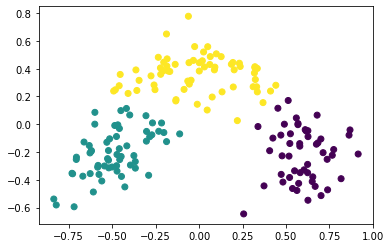

In [48]:
import matplotlib.pyplot as plt
plt.scatter(trans_data[:,0],trans_data[:,1],c=pred_labels)
plt.show()

In [49]:
from sklearn.metrics import silhouette_score
silhouette_score(trans_data,pred_labels)

0.5662252913596103

In [50]:
from sklearn.cluster import KMeans
model = KMeans(3)
model.fit(trans_data)
pred_labels = model.predict(trans_data)

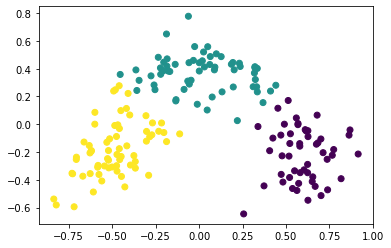

In [51]:
import matplotlib.pyplot as plt
plt.scatter(trans_data[:,0],trans_data[:,1],c=pred_labels)
plt.show()

In [52]:
silhouette_score(trans_data,pred_labels)

0.5680591392935428

* Observations :
Both of them gave similar clusters as represented by both these axeses.
And their silhouette scores too are very similar. This implies that both these algorithms found similar patterns in the data after decomposing the into two components.

* Linear Separability: 
This also implies that the data is highly linearly separable in the reduced 2D space, both K-means and GMM, which are based on distance or density measures, may produce similar cluster assignments.

* Cluster Size and Shape: 
If the clusters in the data are spherical in the reduced 2D space, K-means and GMM are more likely to yield similar results. The plots above suggest the same